# Titles:
- The Unfair Burdens for the Blacks: Stop-and-Frisk in Boston
- The Common Life Experience as a Black: Police Harrassment
- The Places You Don't Belong

On a scale of 1 to 10, how much do you trust the police to protect you when something goes wrong?
 
 
## FIO is a controversial program

On a cold winter night in 2011, a police officer was investigating a break-in in Roxbury. The victim provided vague description of suspects -- three black man, one wearing a red hoodie while the other two wearing dark hooded sweat shirts. 

30 minutes later, an officer spotted Jimmy Warren and his friend (both wearing dark clothing) at a different location. When the officer approached them, they ran, leading to a foot chase. Warren eventually was arrested and searched. Though no contraband was found on Warren, a .22-caliber handgun was recovered in a nearby lawn. Warren was charged with unlawful possession of firearm. 

Five years after Warren's conviction, the Supreme Judicial Court, however, overturned the decision, citing findings from the studies by the American Civil Liberties Union and Boston police that Black and Hispanic residents were crucial predictors of increased stops 2007 and 2010.

The BPD's Field Interrogation and Observation practices, have always been controversial. Under Terry v. Ohio, police have the right to stop anyone on the street if they have "reasonable suspicion" that the person is involved in a crime and to search or detain someone if they have "probable cause." However, as pointed out by many media reports, a staggering and seemingly disproportionate number of people stopped were young Black males, compared to population composition in Boston.

In [7]:
# import packages
import pandas as pd
import re
import datetime
import missingno as msno
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import HTML, display
%matplotlib inline
plt.style.use('bmh')

In [8]:
# load datasets
plc = pd.read_csv("cleaned_fc_data_2015_2019.csv")
indvsl = pd.read_csv("cleaned_fc_name_data_2015_2019.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# plc_noOb = plc[plc.circumstance != 'observed']
plc_stopped = plc[plc.circumstance == 'stopped']
indvsl_stopped = indvsl[indvsl.circumstance == 'stopped']

* The BPD has been releasing FIO reports since 2010, containing interaction details between the BPD officers and indivisuals. The BPD FIOs depart from other states' frisk-and-stops practices in including a broader spectrum of police practices -- non-contact observations, direct encounters and investigative stops. Therefore, the datasets include direct encounters, investigative stops and non-contact observations. In this analysis, I focus only on people who were stopped by the police.
* I did not focus on Hispanic people in my analysis because after 2015, the race categories in new FIO report system only include white, black, asian, native american / alaskan native, native hawaiian / other pacific islander, unknown and others. 

## 42,150 people were stopped by the police in the past 5 years
Between 2015 and 2019, 42,150 people were stopped by the police. The yearly number of people being stopped and frisked have declined since 2017.

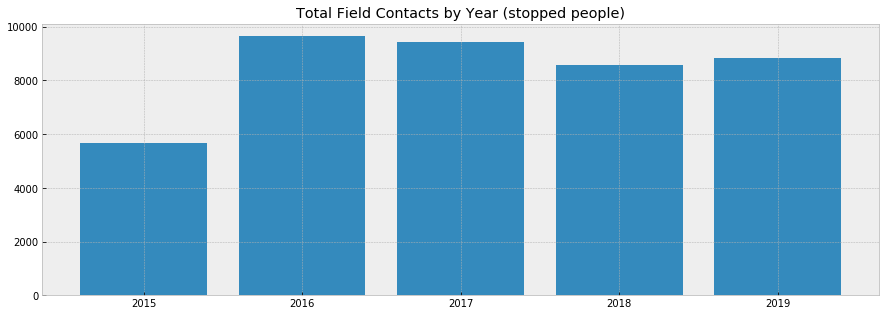

In [10]:
yearly_fc = indvsl_stopped.groupby(["year"]).count()[["contact_date"]]
year_list=[2015, 2016, 2017, 2018, 2019]
f, ax = plt.subplots(figsize=(15, 5))
ax.bar(year_list, yearly_fc["contact_date"])
ax.set_title('Total Field Contacts by Year (stopped people)')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

## They are disproportionally Black
From 2015 to 2019, people stopped by the police were mostly young, male(89%) and Black(69%). According to the U.S. Census Bureau, in 2019, Boston had 692,600 residents that were 48.1 percent male and 25.3 percent Black. This phenomenon lead to controversies over the FIO practices. 

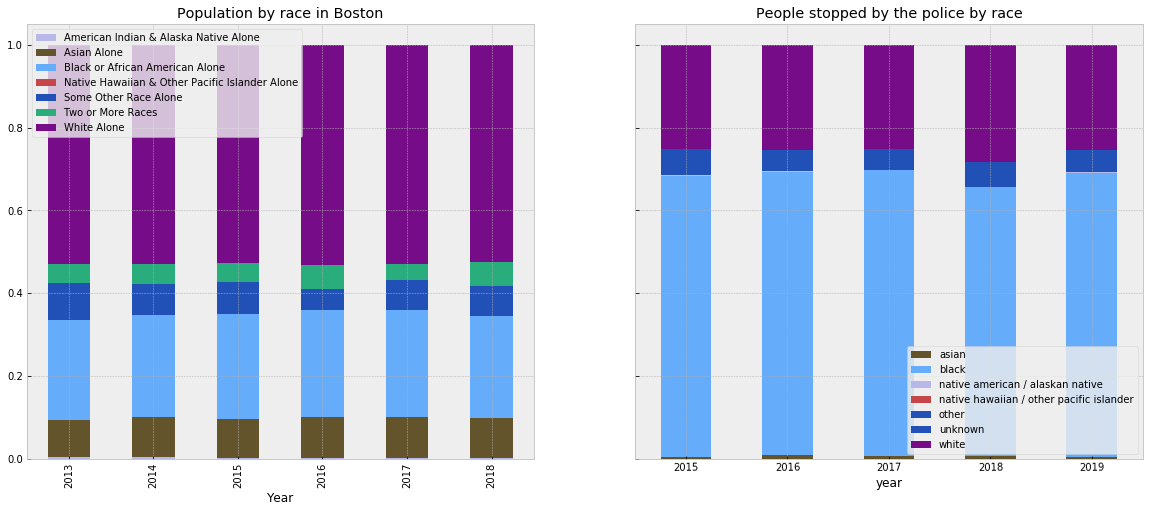

In [11]:
# census data: https://datausa.io/profile/geo/boston-ma/#demographics 
census = pd.read_csv("data/race_and_eth_boston.csv")
census = census[["Race", "Year", "share"]].reset_index(drop=True)
census = census.groupby(["Race", "Year"], as_index=False).sum()
pivot_census = census.pivot_table(index='Year', columns='Race', values='share')

grouped_year_race = indvsl_stopped.groupby(["year", "race"]).agg({"contact_date": "count"})
grouped_year_race_pcts = grouped_year_race.groupby(level=0).apply(lambda x:
                                               100 * x / float(x.sum()))
grouped_year_race_pcts = grouped_year_race_pcts.rename(columns={"contact_date": "percentage"})
# use unstack()
unstacked = grouped_year_race_pcts['percentage'].unstack(level=0)
unstacked = unstacked.div(unstacked.sum())

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
pal1 = ["#b7b8e7", "#64542c", "#65acfa", "#c6474a", "#2150b7", "#2aad7c", "#760c87"]
pal2 = ["#64542c", "#65acfa", "#b7b8e7","#c6474a", "#2150b7", "#2150b7", "#760c87"]

pivot_census.plot.bar(ax=ax1, stacked=True, figsize=(20,8), color=pal1)
ax1.set_title("Population by race in Boston")
ax1.legend(loc='upper left')

unstacked.T.plot(ax=ax2, kind='bar', stacked=True, rot=1, figsize=(20, 8), color=pal2,
               title="% of stops by race")
ax2.set_title("People stopped by the police by race")
ax2.legend(loc='lower right')


## Though that doesn't necessarily indicate the existence of racial biases...
[BPD's explanation](https://bpdnews.com/news/2017/5/23/boston-police-department-releases-latest-field-interrogation-observation-data): "There are many other complicated factors, such as neighborhood crime, police deployments, and neighborhood social disadvantage, as well individual factors such as criminal history and known gang membership that are correlated with the racial distribution of FIO subjects." 

As suggested by this [study](https://www.issuelab.org/resources/25203/25203.pdf), these differences might reflect crime risk differences in different neighborhoods and population groups. Also, according to [this paper](https://www.rand.org/content/dam/rand/pubs/reprints/2011/RAND_RP1427.pdf), the racial composition of the stops made by the police involves some combination of police exposure to offending/suspicious activity, the racial distribution of the population involved in those activities, and the potential for racial bias.

## It conveys a subtle message to the Black residents - you just don't belong in some places 

The police officers tend to conduct FIOs more aggressively in high-crime neighborhoods, which are on average, poorer and home to the minorities due to historical differences in racial segregation, policy biases and other social-political factors. Supporters attribute the decreasing crime rates to the FIO practices even though some [previous studies (p.16)](https://www.urban.org/sites/default/files/publication/33661/413258-Stop-and-Frisk-Balancing-Crime-Control-with-Community-Relations.PDF) pointed out the difficulties to measure the effectiveness of stop-and-frisk practices to lower crime rates.

Residents, predominantly minorities living in poorer neighborhoods with higher crime rates, have to witness and experience constant policing, investigative stops and frisks, resulting in mistrust in BPD. 

→ Derrell “Slim” Weathers, [https://www.baystatebanner.com/2020/07/29/fioed-some-in-boston-face-weekly-police-stops/](https://www.baystatebanner.com/2020/07/29/fioed-some-in-boston-face-weekly-police-stops/)

→ Ivan Richiez of Jamaica Plain ([https://www.youtube.com/watch?v=j6TqBpRux0g](https://www.youtube.com/watch?v=j6TqBpRux0g))

→ [Nathaniel McLean-Nichols](https://www.ywboston.org/news-list/init-students-interviewed-boston-globe/), 'who is black and has shoulder-length dreadlocks, says he has to walk through high-crime neighborhoods to get to his home and he frequently wears hoodies. “I’m thinking, ‘What did I do?’ Even though I’m innocent I still feel like I did something wrong,” he said. “I was demonizing myself.”'

The maps below show the racial demographics in Boston with the Black communities concentrate in south-eastern neighborhoods, such as Roxbury, Dorchester, Mattapan etc, while the majority of the white residents live in north-western parts. And the frequency of getting stopped by the police in each neighborhood differs.

In [12]:
print("Chances of getting stopped in different neighborhood")
print("The darker the color, the higher the number")
display(HTML("<table><tr><td><img src='img/white_pop.png'></td><td><img src='img/black_pop.png'></td><td><img src='img/stop_rates.png'></td></tr></table>"))

Chances of getting stopped in different neighborhood
The darker the color, the higher the number


,,


Based on the historical data, in Nubian Square, you have a 26% chance of being stopped by the police. While in South Boston, that goes down to less than 4%.

The below map shows that in areas with a larger Black population, the frequencies of police investigative stops are higher as well. Besides, a few northern areas with less Black residents, such as South Boston, South End and Jamaica Plian, have also experienced a higher frequency of getting stopped by the police.

In [15]:
display(HTML("<table><tr><td><img style='width:400px;'src='img/blacks_vs_stop_rate.png'></td></tr></table>"))

""


Professor Zimring added, in [this report](https://www.law.georgetown.edu/public-policy-journal/wp-content/uploads/sites/23/2018/05/16-1-Flight-Race-and-Terry-Stops.pdf), that “it would seem difficult to grow up as a Black or Hispanic male under current policy without some experience of ‘stop and frisk.’”

I was curious to find out whether being Black or white will affect one's chance of being stopped by the police. And it turned out to be yes. I divided the stopped people who are black/white by the Black/white population in each neighborhood and discovered that based on the historical data, the chances of you getting stopped by the police in areas with a larger white population are higher if you're Black.

In [35]:
print("Chances of being stopped if you're Black vs & chances of being stopped if you're white")
display(HTML("<table><tr><td><img src='img/black_by_b.png'></td><td><img src='img/white_by_w.png'></td></tr></table>"))

Chances of being stopped if you're Black vs & chances of being stopped if you're white


,


For example, in Allston, where 57% of the residents are white, the percentage of Black people getting stopped by the police is 6 times higher than that of white people. 

Below is a map to show the relationship between percentage of white population and the frequency of being stopped as a Black.

In [17]:
display(HTML("<table><tr><td><img style='width:400px;' src='img/white_pop_vs_black_stopped.png'></td></tr></table>"))

""


In areas where the white residents concentrate, such as Allston, Brighton, Backbay, Fenway, Jamaica Plain etc, percentage of Black people getting stopped by the police is even higher than neighborhoods with more Black residents. 

*Note: Downtown areas including 02108 and 02111 have the highest stop rates (number of stops/residential population). But the residential population in downtown is relatively low.

## TBD Next: police racial breakdowns in selected areas: JP, Allston, Brighton, South Boston...

In [17]:
totalNum_officer = len(plc_stopped.contact_officer.unique())
print("total number of police officers: " + str(totalNum_officer))
stop_conduct_by_officers = plc_stopped.contact_officer.value_counts().reset_index().rename(columns={"index": "officer", "contact_officer":"stop_conduct_counts"})
frisk_conduct_by_officers = frisked_involved.contact_officer.value_counts().reset_index().rename(columns={"index": "officer", "contact_officer":"frisk_conduct_counts"})
numOfOfficer = 300
perOfOfficer = round(numOfOfficer/totalNum_officer, 3)
perOfOffMakeStop = round(stop_conduct_by_officers[:numOfOfficer]["stop_conduct_counts"].sum()/plc_stopped.shape[0], 3)
print(str("{0:.0%}".format(perOfOfficer))+" of police officers contributed to " + str("{0:.0%}".format(perOfOffMakeStop)) + " of investigative stops.")
numOfOfficer = 300
perOfOfficer = round(numOfOfficer/totalNum_officer, 3)
perOfOffMakeFrisk = round(frisk_conduct_by_officers[:numOfOfficer]["frisk_conduct_counts"].sum()/frisked_involved.shape[0], 3)
print(str("{0:.0%}".format(perOfOfficer))+" of police officers contributed to " + str("{0:.0%}".format(perOfOffMakeFrisk)) + " of frisks.")
topStopOff = stop_conduct_by_officers[:100]["officer"].tolist()
topFriskOff = frisk_conduct_by_officers[:100]["officer"].tolist()
topStopFriskOff = []
for n in topStopOff:
    if n in topFriskOff:
        topStopFriskOff.append(n)

print(str(len(topStopFriskOff)) + " of the top 100 stoppers are also the top 100 friskers.")

total number of police officers: 1474
20% of police officers contributed to 79% of investigative stops.
20% of police officers contributed to 80% of frisks.
78 of the top 100 stoppers are also the top 100 friskers.


## TBD Conclusion

Some quotes from essays and news articles:

"Researchers in 2014 finalized a report compiled at the request of both the police department and the ACLU analyzing so-called field interrogation/observation/frisk and/or search, or FIOs, from 2007-10. They found that the incidence of crime heavily influenced stops but that, controlling for other factors, "the percentage of black and Hispanic residents in Boston neighborhoods were also significant predictors of increased" stops." The BPD's replies: [http://www.openmediaboston.org/content/full-text-boston-police-department-statement-aclu-stop-and-frisk-report-3035](http://www.openmediaboston.org/content/full-text-boston-police-department-statement-aclu-stop-and-frisk-report-3035)

It was hard and will always be hard to inspect the existence of racial biases in BPD policing. Higher crime rates and more gang activities can lead to higher stop-and-frisk rates. However, conducting more FIOs practices in specific neighborhoods or on specific group of people can have serious influence. “You can have a short-term effect on crime with stop and frisk, and crime goes down. But now you’ve alienated 260 kids that were stopped in ways that made them unhappy. It may lead to worse citizens in the future.” – David Weisburd, Professor George Mason University and Hebrew University (https://www.urban.org/sites/default/files/publication/33661/413258-Stop-and-Frisk-Balancing-Crime-Control-with-Community-Relations.PDF)

"Data alone does not solve all problems or answer all questions. When it comes to stop-and-frisk, showing that black men are disproportionately more likely to be stopped does not suggest bias in a context where black men commit more crime."

## Barriers:
- dont have crime data at a zip code level.

## Method:

- How I Cleaned the Dataset: https://github.com/sabrinamochi/bpd_fio_data_analysis/blob/master/data-cleaning-in-general.ipynb
- How I Created the Dataset for Mapping: https://github.com/sabrinamochi/bpd_fio_data_analysis/blob/master/data-cleaning-for-maps.ipynb
- Exploratory Data Analysis Done by Me: https://github.com/sabrinamochi/bpd_fio_data_analysis/blob/master/data-analysis-in-general.ipynb 

research refs:
- Warren's story explained by David Rossman: https://www.bu.edu/law/record/articles/2016/commonwealth-v-warren-racial-profiling-and-police-interrogations/ 
- essay against Mass supreme court's decision: https://www.law.georgetown.edu/public-policy-journal/wp-content/uploads/sites/23/2018/05/16-1-Flight-Race-and-Terry-Stops.pdf 
-  research indicates that racial minorities, and in particular blacks, are disproportionately involved in serious personal offenses as both victims and offenders. https://www.jstor.org/stable/2095265?origin=crossref
- Methods of assessing racially biased police stops: https://www.rand.org/content/dam/rand/pubs/reprints/2011/RAND_RP1427.pdf 
- comprehensive research requested by bpd: https://scholarship.law.columbia.edu/cgi/viewcontent.cgi?article=2961&context=faculty_scholarship | https://www.issuelab.org/resources/25203/25203.pdf 
- nyt story: https://www.nytimes.com/interactive/2014/09/19/nyregion/stop-and-frisk-is-all-but-gone-from-new-york.html 
- aclu report: https://www.aclum.org/sites/default/files/wp-content/uploads/2015/06/reports-black-brown-and-targeted.pdf
- using internval benchmark to analyze potential racial disparity: https://www.rand.org/content/dam/rand/pubs/technical_reports/2007/RAND_TR534.pdf 
- use machinelearning to inspect potential racial disparity: http://groups.csail.mit.edu/mac/classes/6.805/student-papers/fall18-papers/Stop%20and%20Frisk.pdf 
- https://www.bostonglobe.com/metro/2016/09/20/sjc-judges-must-consider-high-rate-fios-between-boston-police-and-men-color/0baqga4wecvXxsWZwSnNlI/story.html 
- https://scholar.harvard.edu/jonjay/blog/did-public-scrutiny-blunt-boston%E2%80%99s-stop-and-frisk-program
- https://www.bloomberg.com/news/articles/2015-08-24/the-missing-ingredient-in-stop-and-frisk-reform-open-data

storytelling refs:
- NYT Minneapolis Police Use Force Against Black People at 7 Times the Rate of Whites :https://www.nytimes.com/interactive/2020/06/03/us/minneapolis-police-use-of-force.html#commentsContainer
- https://www.theguardian.com/us-news/ng-interactive/2015/oct/19/homan-square-chicago-police-detainees
- NatGeo: https://www.nationalgeographic.com/magazine/2018/04/the-stop-race-police-traffic/
- https://projects.propublica.org/coronavirus-unemployment/
- map: https://vallandingham.me/multivariate_maps.html
- map: https://cartographicperspectives.org/index.php/journal/article/view/1569/1835
- map: https://www.joshuastevens.net/cartography/make-a-bivariate-choropleth-map/

Source:
- Boston University School of Law Professor and Director of the Criminal Law Clinical Programs David Rossman 
- Professor Philip Heymann, crediteing the “new policing” for the sharp crime declines of the preceding decade.
- [Anthony Braga](https://news.northeastern.edu/2019/02/11/northeastern-professor-taking-a-fresh-look-at-state-of-gang-activity-in-boston/) has spent nearly 25 years of his career working with the Boston Police Department to examine crime, gangs, and efforts to reduce violence in the city.
- Nathaniel McLean-Nichols, who is black and has shoulder-length dreadlocks, says he has to walk through high-crime neighborhoods to get to his home and he frequently wears hoodies. “I’m thinking, ‘What did I do?’ Even though I’m innocent I still feel like I did something wrong,” he said. “I was demonizing myself.”
- Derrell “Slim” Weathers, https://www.baystatebanner.com/2020/07/29/fioed-some-in-boston-face-weekly-police-stops/
- Ivan Richiez of Jamaica Plain (https://www.youtube.com/watch?v=j6TqBpRux0g)
- David Weisburd, Professor George Mason University and Hebrew University (https://www.urban.org/sites/default/files/publication/33661/413258-Stop-and-Frisk-Balancing-Crime-Control-with-Community-Relations.PDF)

Data sources:
- [BPD FIO data](https://data.boston.gov/dataset/boston-police-department-fio) (The FIO reports contain no information about whether the field contacts led to an arrest or seizure of contraband. My analysis focuses on the period from 2015 to 2019.)

#### !!!Data Constraints!!!

"While these two tables align on the field contact number (fc_num) column, it is not methodologically correct to join the two datasets for the purpose of generating aggregate statistics on columns from the FieldContact table. Doing so would lead to incorrect estimates stemming from contacts with multiple individuals. As noted in the Data Key (New RMS) file, several of the columns in the FieldContact table apply to the contact as a whole, but may not necessarily apply to each individual involved in the contact." These include:

- frisked
- searchperson
- summonsissued
- circumstances
- basis
- contact_reason
